<a href="https://colab.research.google.com/github/CarrenP/datamining/blob/main/Carren_0706022210052_Week_6_Adult_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [ ]:
adult = pd.read_csv('https://raw.githubusercontent.com/CarrenP/files/refs/heads/main/adult.csv')
adult.head()

# importing data set dari github dengan tipe file csv dan juga print 10 kolum teratas dari data yang ada.

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
adult.info()

# menunjukan informasi mengenai tabel, dari data type, jumlah data hingga nama kolum.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
adult.describe()

# menampilkan ringkasan statistik dari dataset penguins yang berisi informasi tentang kolom numerik.

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [29]:
# mengisi missing value dengan modus, karena modus merupakan niai yang paling sering muncul.

for col in ['workclass', 'occupation', 'native-country']:
    adult[col] = adult[col].fillna(adult[col].mode()[0])

In [31]:
# mengecek apakah ada null value
adult.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


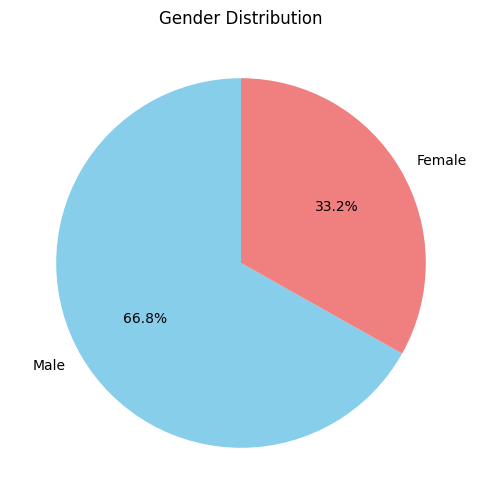

In [18]:
gender_counts = adult['gender'].value_counts()

# Membuat Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.show()

# menunjukkan distribusi gender dari dataset yang ada.

<ipython-input-9-c4adb8aaf8e8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='income', y='age', data=average_age, palette='Set1')


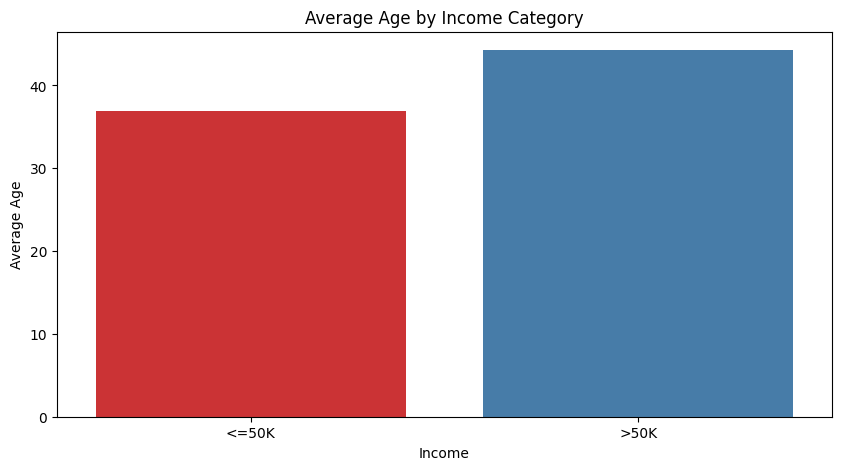

In [ ]:
average_age = adult.groupby('income')['age'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='income', y='age', data=average_age, palette='Set1')
plt.title('Average Age by Income Category')
plt.xlabel('Income')
plt.ylabel('Average Age')
plt.show()
# menunjukkan distribusi income berdasarkan umur.

In [32]:
label_encoder = LabelEncoder()

# untuk identifikasi dan memilih semua kolom kategorikal
categorical_columns = adult.select_dtypes(include=['object']).columns

# untuk mengonversi setiap kolom kategorikal ke numerik
for col in categorical_columns:
    adult[col] = label_encoder.fit_transform(adult[col])

# untuk menampilkan 10 data random
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0


In [33]:
X=adult.drop('income',axis=1)
y=adult['income']

# membuat X berisi semua kolom kecuali kolom income, dan y berisi kolom species dari DataFrame

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# membagi dataset, training sebesar 80% dan test sebesar 20%

In [35]:
X_train.shape,X_test.shape

# menampilkan jumlah baris dan kolum dari variabel X_train dan X-test

((39073, 14), (9769, 14))

In [36]:
#Criterion Entropy
#a
clf_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=0)

# Fit the model on your training data (X_train, y_train)
clf_entropy.fit(X_train, y_train)

clf_entropy


# membuat, melatih, dan menampilkan model Decision Tree berbasis entropy

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [37]:
#b
y_pred = clf_entropy.predict(X_test)

accuracy_entropy = accuracy_score(y_test, y_pred)
print(f"Model accuracy score with criterion entropy index: {accuracy_entropy:.4f}")

# melatih, memprediksi, dan menghitung akurasi model Decision Tree menggunakan kriteria entropy index

Model accuracy score with criterion entropy index: 0.8449


In [38]:
y_train_pred = clf_entropy.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test set and calculate accuracy
y_test_pred = clf_entropy.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

# Evaluate if the model is overfitting or underfitting
if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
elif train_accuracy == test_accuracy:
    print("The model is likely to be well-balanced.")
else:
    print("The model might be underfitting.")

#  membandingkan akurasi pelatihan dan akurasi pengujian dari model Decision Tree berbasis Gini yang telah dilatih dan jug amelihat apakh modelnya over atau under fititng

Training accuracy: 0.8384
Test accuracy: 0.8449
The model might be underfitting.


[Text(0.5, 0.875, 'x[7] <= 0.5\nentropy = 0.796\nsamples = 39073\nvalue = [29676, 9397]'),
 Text(0.25, 0.625, 'x[4] <= 12.5\nentropy = 0.992\nsamples = 15869\nvalue = [8752, 7117]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[10] <= 5095.5\nentropy = 0.918\nsamples = 11142\nvalue = [7435, 3707]'),
 Text(0.0625, 0.125, 'entropy = 0.882\nsamples = 10613\nvalue = [7426, 3187]'),
 Text(0.1875, 0.125, 'entropy = 0.124\nsamples = 529\nvalue = [9, 520]'),
 Text(0.375, 0.375, 'x[10] <= 5095.5\nentropy = 0.854\nsamples = 4727\nvalue = [1317, 3410]'),
 Text(0.3125, 0.125, 'entropy = 0.914\nsamples = 3999\nvalue = [1315, 2684]'),
 Text(0.4375, 0.125, 'entropy = 0.027\nsamples = 728\nvalue = [2, 726]'),
 Text(0.75, 0.625, 'x[10] <= 7055.5\nentropy = 0.463\nsamples = 23204\nvalue = [20924, 2280]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= 4.5\nentropy = 0.398\nsamples = 22702\nvalue = [20910, 1792]'),
 Text(0.5625, 0.125, 'entropy = 0.287\nsamples = 20994\nvalue = [1994

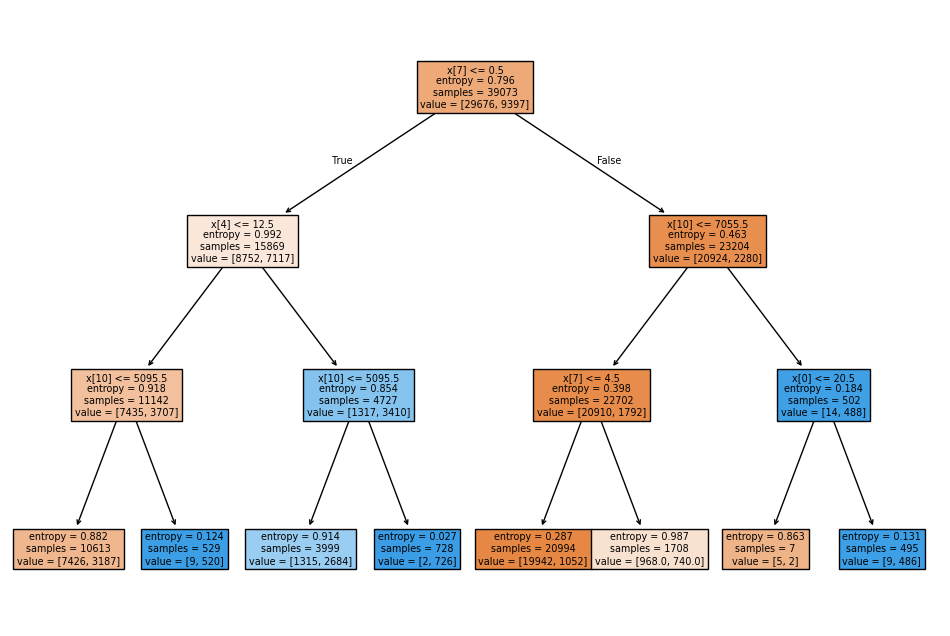

In [39]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_entropy.fit(X_train, y_train), filled=True)

# menampilkan decision tree berbasis entropy

In [40]:
#Criterion Entropy
#a
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=0)

# Fit the model on your training data (X_train, y_train)
clf_gini.fit(X_train, y_train)

clf_gini


# membuat dan melatih model Decision Tree menggunakan Gini index

DecisionTreeClassifier(max_depth=3, random_state=0)

In [41]:
y_pred_gini = clf_gini.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred)
print(f"Model accuracy score with criterion entropy index: {accuracy_gini:.4f}")

# print hasil akurasi

Model accuracy score with criterion entropy index: 0.8449


In [42]:
y_train_pred = clf_gini.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test set and calculate accuracy
y_test_pred = clf_gini.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

# Evaluate if the model is overfitting or underfitting
if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
elif train_accuracy == test_accuracy:
    print("The model is likely to be well-balanced.")
else:
    print("The model might be underfitting.")

# menampilkan akurasi dari model Decision Tree

Training accuracy: 0.8384
Test accuracy: 0.8449
The model might be underfitting.


[Text(0.5, 0.875, 'x[7] <= 0.5\ngini = 0.365\nsamples = 39073\nvalue = [29676, 9397]'),
 Text(0.25, 0.625, 'x[4] <= 12.5\ngini = 0.495\nsamples = 15869\nvalue = [8752, 7117]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[10] <= 5095.5\ngini = 0.444\nsamples = 11142\nvalue = [7435, 3707]'),
 Text(0.0625, 0.125, 'gini = 0.42\nsamples = 10613\nvalue = [7426, 3187]'),
 Text(0.1875, 0.125, 'gini = 0.033\nsamples = 529\nvalue = [9, 520]'),
 Text(0.375, 0.375, 'x[10] <= 5095.5\ngini = 0.402\nsamples = 4727\nvalue = [1317, 3410]'),
 Text(0.3125, 0.125, 'gini = 0.441\nsamples = 3999\nvalue = [1315, 2684]'),
 Text(0.4375, 0.125, 'gini = 0.005\nsamples = 728\nvalue = [2, 726]'),
 Text(0.75, 0.625, 'x[10] <= 7055.5\ngini = 0.177\nsamples = 23204\nvalue = [20924, 2280]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= 4.5\ngini = 0.145\nsamples = 22702\nvalue = [20910, 1792]'),
 Text(0.5625, 0.125, 'gini = 0.095\nsamples = 20994\nvalue = [19942, 1052]'),
 Text(0.6875, 0.125, '

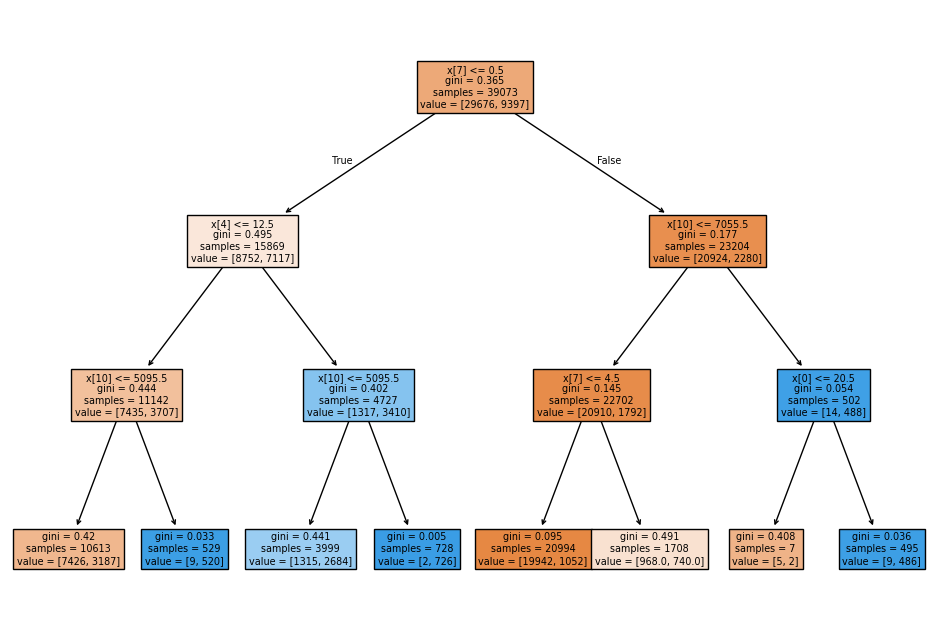

In [43]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train), filled=True)
# menapilkan decision tree berbasis gini

In [44]:
cmatrix = confusion_matrix(y_test, y_pred) #Untuk membuat confusion matrix
print("Confusion Matrix:\n", cmatrix)

cmatrix = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix:\n", cmatrix)

# Code ini digunakn untuk mencetak confusion matrix.

Confusion Matrix:
 [[7136  343]
 [1172 1118]]
Confusion Matrix:
 [[7136  343]
 [1172 1118]]


In [45]:
report = classification_report(y_test, y_pred)
print("Classification Report Entropy:\n", report)

report = classification_report(y_test, y_pred_gini)
print("Classification Report Gini:\n", report)

# menghasilkan dan menampilkan laporan klasifikasi untuk model Decision Tree entropy dan Gini index

Classification Report Entropy:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      7479
           1       0.77      0.49      0.60      2290

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769

Classification Report Gini:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      7479
           1       0.77      0.49      0.60      2290

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769



In [46]:
# naive bayes

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# menginstal objek Gaussian Naive Bayes dari pustaka scikit-learn.melatih model Naive Bayes yang telah dibuat

GaussianNB()

In [47]:
nb_y_pred = nb_classifier.predict(X_test)
# untuk memprediksi label (target) menggunakan model Naive Bayes yang telah dilatih sebelumnya

In [48]:
cmatrix = confusion_matrix(y_test, nb_y_pred)
print("Confusion Matrix:\n", cmatrix)

#Untuk membuat dan menampilkan confussion matrix dari naive bayes

#d
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, nb_y_pred)))

# menujukan hasil akurasi

Confusion Matrix:
 [[7099  380]
 [1580  710]]
Accuracy Score: 0.7994


In [49]:
#e

print(classification_report(y_test, nb_y_pred))
# menampilkan classification report

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7479
           1       0.65      0.31      0.42      2290

    accuracy                           0.80      9769
   macro avg       0.73      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



In [52]:
# menggunakan logistic regression

#a

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
# melatih model

KNeighborsClassifier()

In [55]:
#b

# Prediksi hasil menggunakan model KNN
y_pred_knn= classifier.predict(X_test)

# Buat tabel perbandingan antara y_test dan y_pred
comparison_table = pd.DataFrame({"y_test": y_test, "y_pred": y_pred_knn})

# Tampilkan lima baris pertama dari tabel perbandingan
print(comparison_table.head())

# Membuat prediksi dataframe perbandingan dan juga menampilkan 5 row pertama.

       y_test  y_pred
7762        0       0
23881       0       0
30507       1       1
28911       0       0
19484       0       0


In [56]:
#c

print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_knn)))
#menampilkan hasil akurasi dari logistic regression

Accuracy Score: 0.7829


In [57]:
# d

cmatrix = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", cmatrix)
# menampilkan confusion matrix

Confusion Matrix:
 [[6863  616]
 [1505  785]]


In [58]:
# e

print (classification_report (y_test, y_pred_knn))
# menampilkan classification report

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      7479
           1       0.56      0.34      0.43      2290

    accuracy                           0.78      9769
   macro avg       0.69      0.63      0.65      9769
weighted avg       0.76      0.78      0.76      9769



Coclusion:

Berdasarkan hasil evaluasi model K-Nearest Neighbors (KNN) dan Naive Bayes pada dataset, berikut adalah kesimpulan yang bisa diambil:

1. **Akurasi**:
   - Dari sisi akurasi, Naive Bayes sedikit lebih baik daripada KNN dengan angka 80%.

2. **F1-Score**:
   - kedua model memiliki performa yang baik dalam mengklasifikasikan kelas mayoritas (0)
   - Kedua model menunjukkan kesulitan dalam mengklasifikasikan kelas minoritas (1), tetapi KNN sedikit lebih baik dalam hal ini.


3. **Recall untuk Kelas Minoritas (1)**:
   - KNN lebih baik mendeteksi positif kelas minoritas daripada Naive Bayes, meskipun perbedaannya tidak besar.

5. **Weighted Avg**:
   - *Weighted avg* untuk kedua model menunjukkan nilai yang cukup dekat di mana **KNN** memiliki *weighted avg* F1 sebesar **0.76**, sedangkan Naive Bayes **0.77**. Naive Bayes sedikit lebih baik dalam performa keseluruhan di seluruh kelas, tetapi perbedaannya tidak signifikan.

### Kesimpulan Akhir
Secara keseluruhan, **Naive Bayes** memiliki kinerja yang condong lebih baik untuk hal akurasi dan rata-rata dibanding dari f1-score, terutama untuk kelas mayoritas (0). Namun, **KNN** menunjukkan  keunggulan dalam mendeteksi kelas minoritas (1) dengan recall yang lebih tinggi. Pemilihan model dapat bergantung pada tujuan yang ingin dicapai. jika akurasi keseluruhan lebih penting, Naive Bayes bisa digunakan.